In [1]:
!pip install pycaret scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 7.2 MB/s eta 0:00:00
   ━━

In [1]:
import pandas as pd
from pycaret.clustering import *
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Example: Load a dataset
from sklearn.datasets import make_blobs

# Create synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.5, random_state=42)
data = pd.DataFrame(X, columns=["Feature_1", "Feature_2"])


In [3]:
# Initialize PyCaret's clustering setup
setup_clustering = setup(data, normalize=True, session_id=42)


,Description,Value
0,Session id,42
1,Original data shape,"(300, 2)"
2,Transformed data shape,"(300, 2)"
3,Numeric features,2
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


In [5]:
# Scale data manually (PyCaret normalizes internally, but you can use scikit-learn as well)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [6]:
# Create a DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit and predict clusters
clusters = dbscan.fit_predict(scaled_data)

# Add the cluster labels to the original dataframe
data['Cluster'] = clusters


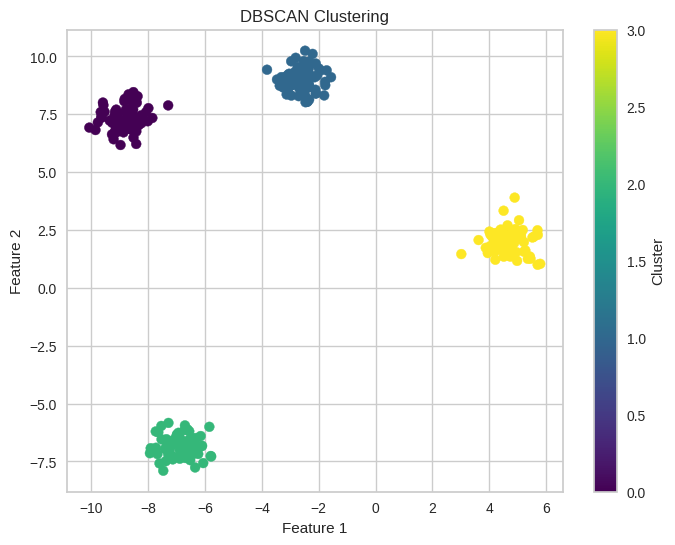

In [8]:
# Plot using matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(data['Feature_1'], data['Feature_2'], c=data['Cluster'], cmap='viridis', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()
